In [1]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel, describe
import matplotlib.pyplot as plt

In [2]:
smith_results = pd.read_csv("./results/representation_learning_transcriptomics_results.csv")
tcga_classification_tasks = pd.read_csv("./data_utilities/tcga_classification_tasks.csv")

In [3]:
binary = smith_results['label_type'] == 'binary'
no_embedding = smith_results['unsupervised_model'] == 'no embedding'
gene_set = smith_results['gene_set'] == 'all'
norm = smith_results['normalization'] == 'clr'
tcga = ["GSE" not in e for e in smith_results['task']]
l2 = smith_results['supervised_model'] == 'logistic regression'
knn = smith_results['supervised_model'] == 'k nearest neighbor'

In [4]:
tcga_results_smith_knn = smith_results[binary & no_embedding & gene_set & norm & tcga & knn].copy()
tcga_results_smith_l2 = smith_results[binary & no_embedding & gene_set & norm & tcga & l2].copy()

In [5]:
# set(tcga_results_smith['supervised_model'])

In [6]:
tcga_results_smith_l2.sort_values(by='task', inplace=True)
tcga_results_smith_knn.sort_values(by='task', inplace=True)
tcga_results_smith_l2

,unsupervised_model,supervised_model,gene_set,normalization,task,group,label_type,num_genes,num_features,num_samples,num_classes,score,score_units
29,no embedding,logistic regression,all,clr,BRCA stage,test,binary,57992,57992,1134,2,0.625216,AUC
34,no embedding,logistic regression,all,clr,CESC grade,train,binary,57992,57992,306,2,0.707146,AUC
36,no embedding,logistic regression,all,clr,COAD stage,train,binary,57992,57992,505,2,0.686547,AUC
38,no embedding,logistic regression,all,clr,HNSC grade,test,binary,57992,57992,504,2,0.698141,AUC
26,no embedding,logistic regression,all,clr,KIRC grade,train,binary,57992,57992,544,2,0.593343,AUC
42,no embedding,logistic regression,all,clr,KIRC stage,train,binary,57992,57992,544,2,0.789962,AUC
41,no embedding,logistic regression,all,clr,LGG grade,train,binary,57992,57992,532,2,0.769263,AUC
35,no embedding,logistic regression,all,clr,LIHC grade,train,binary,57992,57992,374,2,0.668970,AUC
31,no embedding,logistic regression,all,clr,LIHC stage,train,binary,57992,57992,374,2,0.674100,AUC
33,no embedding,logistic regression,all,clr,LUAD stage,train,binary,57992,57992,542,2,0.629606,AUC


In [7]:
filenames_ntk = os.listdir("./results/ntk/")
filenames_l2 = os.listdir("./results/l2-liblinear/")
filenames_knn = os.listdir("./results/knn/")
results_ntk = [pd.read_csv(f"./results/ntk/{f}") for f in filenames_ntk]
results_l2 = [pd.read_csv(f"./results/l2-liblinear/{f}") for f in filenames_l2]
results_knn = [pd.read_csv(f"./results/knn/{f}") for f in filenames_knn]

In [8]:
mean_performance_ntk = pd.DataFrame( [e.auc.mean() for e in results_ntk], columns=['auc'] )
mean_performance_l2 = pd.DataFrame( [e.auc.mean() for e in results_l2], columns=['auc'] )
mean_performance_knn = pd.DataFrame( [e.auc.mean() for e in results_knn], columns=['auc'] )
mean_performance_ntk['task'] = [" ".join(f.split('_')[3:5]) for f in filenames_ntk]
mean_performance_l2['task'] = [" ".join(f.split('_')[3:5]) for f in filenames_l2]
mean_performance_knn['task'] = [" ".join(f.split('_')[3:5]) for f in filenames_knn]


In [9]:
mean_performance_l2.head(10)

,auc,task
0,0.639372,KIRC grade
1,0.782398,KIRC stage
2,0.627469,LUAD stage
3,0.614676,SKCM stage
4,0.679008,UCEC stage
5,0.895875,UCEC grade
6,0.682333,THCA stage
7,0.640705,BRCA stage
8,0.717279,CESC grade
9,0.737131,HNSC grade


In [10]:
mean_performance_knn.sort_values(by='task', inplace=True)
mean_performance_l2.sort_values(by='task', inplace=True)
mean_performance_ntk.sort_values(by='task', inplace=True)

In [11]:
# check alignment
assert(all( [a == b for a,b in zip(mean_performance_knn['task'], mean_performance_l2['task'])] ))
assert(all( [a == b for a, b in zip(mean_performance_l2['task'], tcga_results_smith_l2['task'])] ))

In [12]:
aggregated_results = pd.DataFrame()
aggregated_results['task'] = mean_performance_l2['task']
aggregated_results['results_l2'] = mean_performance_l2['auc']
aggregated_results['results_ntk'] = mean_performance_ntk['auc']
aggregated_results['results_knn'] = mean_performance_knn['auc']


In [13]:
aggregated_results.sort_values(by='task', inplace=True)
aggregated_results.head(5)

,task,results_l2,results_ntk,results_knn
7,BRCA stage,0.640705,0.633777,0.594248
8,CESC grade,0.717279,0.702006,0.596799
14,COAD stage,0.695441,0.693133,0.626325
9,HNSC grade,0.737131,0.749291,0.642339
0,KIRC grade,0.639372,0.637204,0.697010


In [14]:
# check they are aligned correctly
assert(all( [a == b for a,b in zip(aggregated_results['task'], tcga_results_smith_l2['task'])] ))
assert(all( [a == b for a,b in zip(aggregated_results['task'], tcga_results_smith_knn['task'])] ))

In [15]:
sns_data = pd.DataFrame()
sns_data['Task'] = aggregated_results['task'].values
sns_data['NTK'] = aggregated_results['results_ntk'].values
sns_data['L2LR'] = aggregated_results['results_l2'].values
sns_data['L2LR Smith'] = tcga_results_smith_l2['score'].values
sns_data['KNN Smith'] = tcga_results_smith_knn['score'].values
sns_data['KNN'] = aggregated_results['results_knn'].values

In [16]:
def plot_scatter(data_frame, var_name_1, var_name_2):
    # scatter plot
    plt.rcParams['figure.figsize'] = 8.0, 6.0
    plt.rcParams['font.size'] = 12.0
    sns.regplot(data=data_frame, x=var_name_1, y=var_name_2)
    plt.title(f'{var_name_1} vs {var_name_2}')
    plt.show()

def plot_differences(data_frame, var_name_1, var_name_2):
    plt.rcParams['figure.figsize'] = 8.0, 6.0
    plt.rcParams['font.size'] = 12.0
    # describe and plot differences
    data_frame['Differences'] = data_frame[var_name_1] - data_frame[var_name_2]
    data_frame.sort_values(by='Differences', inplace=True)
    n_obs = len(data_frame)
    plt.scatter(x=data_frame['Task'], y=data_frame['Differences'])
    plt.hlines(y=0, xmin=0, xmax=n_obs, colors='r')
    plt.xticks(rotation=90);
    plt.title(f"Differences between performance estimates of {var_name_1} vs. {var_name_2}")
    plt.show()
    # t-test for bias
    # print(f"t-test for bias, {var_name_1} vs {var_name_2}:")
    print(ttest_rel(a=data_frame[var_name_1], b=data_frame[var_name_2]))
    print(describe(data_frame['Differences']))

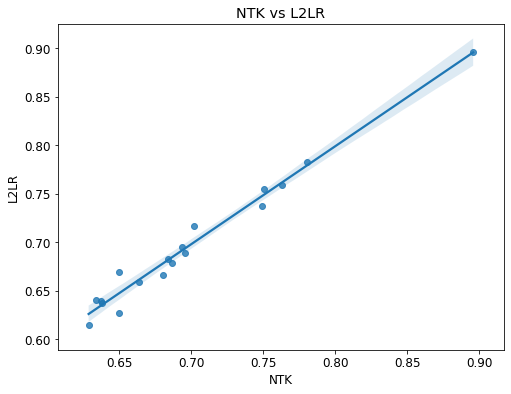

In [22]:
plot_scatter(sns_data, 'NTK', 'L2LR')

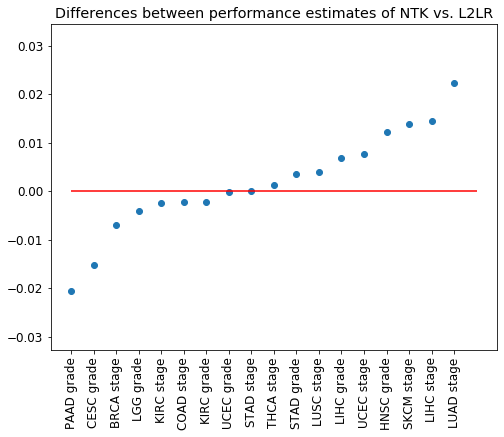

Ttest_relResult(statistic=0.7271611775831218, pvalue=0.47702260346386116)
DescribeResult(nobs=18, minmax=(-0.02050432900432897, 0.02221556838115446), mean=0.0017903370698179352, variance=0.00010911406728336615, skewness=-0.17841535700983835, kurtosis=0.0034527561586230604)


In [23]:
plot_differences(sns_data, 'NTK', 'L2LR')